In [141]:
import numpy as np
import pandas as pd

from statsmodels.graphics import tsaplots
from load_dataset import Dataset
import matplotlib.pyplot as plt
import plotting

from statsmodels.tsa.stattools import adfuller

In [142]:
# не импортировать
from stl import detect_ts

In [143]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
dataset = Dataset('../data/dataset/')

In [145]:
ts = dataset['stl_example.csv']

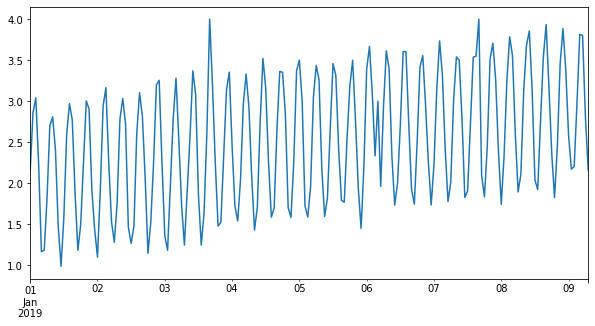

In [146]:
ts.plot(figsize=(10, 5))

In [147]:
res = detect_ts(ts, period=2)

In [148]:
trend, season, resid = res

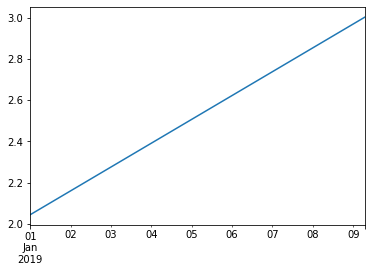

In [149]:
trend.plot()

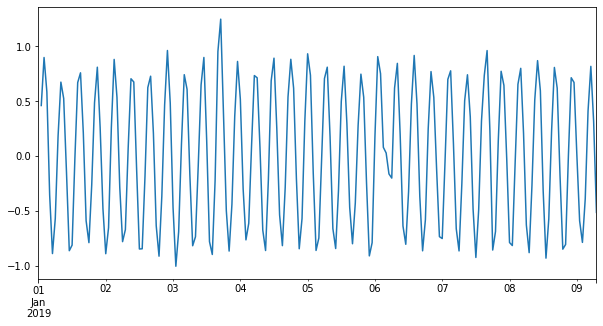

In [150]:
season.plot(figsize=(10, 5))

In [151]:
plotting.plot_ts(resid)

In [152]:
adfuller(resid.dropna())

(-7.613846675349362,
 2.2185222490645803e-11,
 12,
 186,
 {'1%': -3.466005071659723,
  '5%': -2.8772078537639385,
  '10%': -2.5751221620996647},
 -339.17210593343293)

In [133]:
sigma = 2
threshold = sigma * resid.std()
indexes = np.where(abs(resid) > threshold)[0]
anomalies = ts[indexes]

In [134]:
anomalies

2019-01-07 16:00:00    4.0
Name: 0, dtype: float64

TS = T + S + R - additive
TS = T*S*R - multiplicative

In [ ]:
ts.rolling(5).median()

Задание:
    Ряд - stl_example.csv
    1. Апроксимировать ряд линейным трендом.
    2. Найти период сезонности по коррелограме.
    3. Получить сезонность при помощи медианного фильтра с окном равным, период/к, к подобрать.
    4. Вычесть тренд и сезонность, получить остатки.
    5. Проверить остатки на стационарность.
    6. Сделать порог на остатки. Получить аномалии.
   
detect_ts должна возвращать tuple из: (тренд, сезонность, остатки)

In [149]:
def extract_trend(ts: pd.Series):
    """
    Извлекает линейный тренд из временного ряда
    """
    # <ваш код здесь>
    trend = None
    return trend

In [150]:
def extract_seasonality(ts_detrended):
    """
    Извлекает сезонную компоненту
    """
    # <ваш код здесь>
    season = None
    return season

In [ ]:
def detect_ts(ts):
    """
    Возвращает tuple(trend, season, residuals)
    """

In [176]:
## Решения "из коробки"
from statsmodels.tsa.seasonal import seasonal_decompose

In [182]:
decomp = seasonal_decompose(ts, period=6)

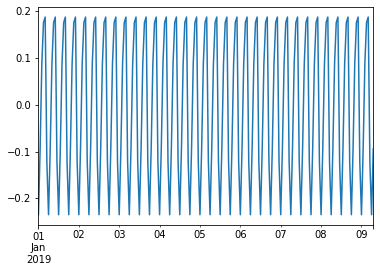

In [183]:
decomp.seasonal.plot()

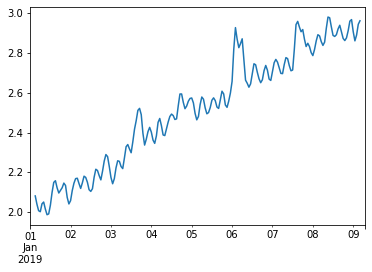

In [185]:
decomp.trend.plot()

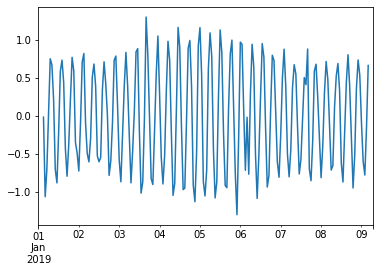

In [186]:
decomp.resid.plot()

In [187]:
adfuller(decomp.resid.dropna())

(-8.636599897383771,
 5.569118685308257e-14,
 12,
 181,
 {'1%': -3.467004502498507,
  '5%': -2.8776444997243558,
  '10%': -2.575355189707274},
 -235.0352609805023)